## **Task 1 : Exploratory Data Analysis (EDA) [3 marks]**
### Preprocessing


From CombineScript.py

In [49]:
# Library imports
import pandas as pd
import numpy as np
import os 

import warnings

from metrics import accuracy

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Traing Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_x_train.txt"), sep='\\s+',
                          header=None)
total_acc_y = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_y_train.txt"), sep='\\s+',
                          header=None)
total_acc_z = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_z_train.txt"), sep='\\s+',
                          header=None)

# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path, "subject_train.txt"), sep='\\s+', header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path, "y_train.txt"), sep='\\s+', header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where(subject_train.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined", "Train", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Train", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Train", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the training data")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Test Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_x_test.txt"), sep='\\s+',
                          header=None)
total_acc_y = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_y_test.txt"), sep='\\s+',
                          header=None)
total_acc_z = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_z_test.txt"), sep='\\s+',
                          header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path, "subject_test.txt"), sep='\\s+', header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path, "y_test.txt"), sep='\\s+', header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

    sub_idxs = np.where(subject_test.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        if not os.path.exists(os.path.join("Combined", "Test", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Test", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []
        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Test", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the testing data")
print("Done Combining the data")

# Creation of raw dataset

x = pd.read_csv(os.path.join(train_path,"X_train.txt"), sep='\\s+', header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), sep='\\s+', header=None)
featurelist = list(featurel.loc[:,1])
x.columns = featurelist
yg = pd.read_csv(os.path.join(train_path,"y_train.txt"), sep='\\s+', header=None)
xtest = pd.read_csv(os.path.join(test_path,"X_test.txt"), sep='\\s+', header=None)
xtest.columns = featurelist
ytest = pd.read_csv(os.path.join(test_path,"y_test.txt"), sep='\\s+', header=None)

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Done Combining the training data
Done Combining the testing data
Done Combining the data


From MakeDataset.py

In [50]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('dark_background') # for dark background of plts

# Constants
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Train Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Test Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Final Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## Questions

### 1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]


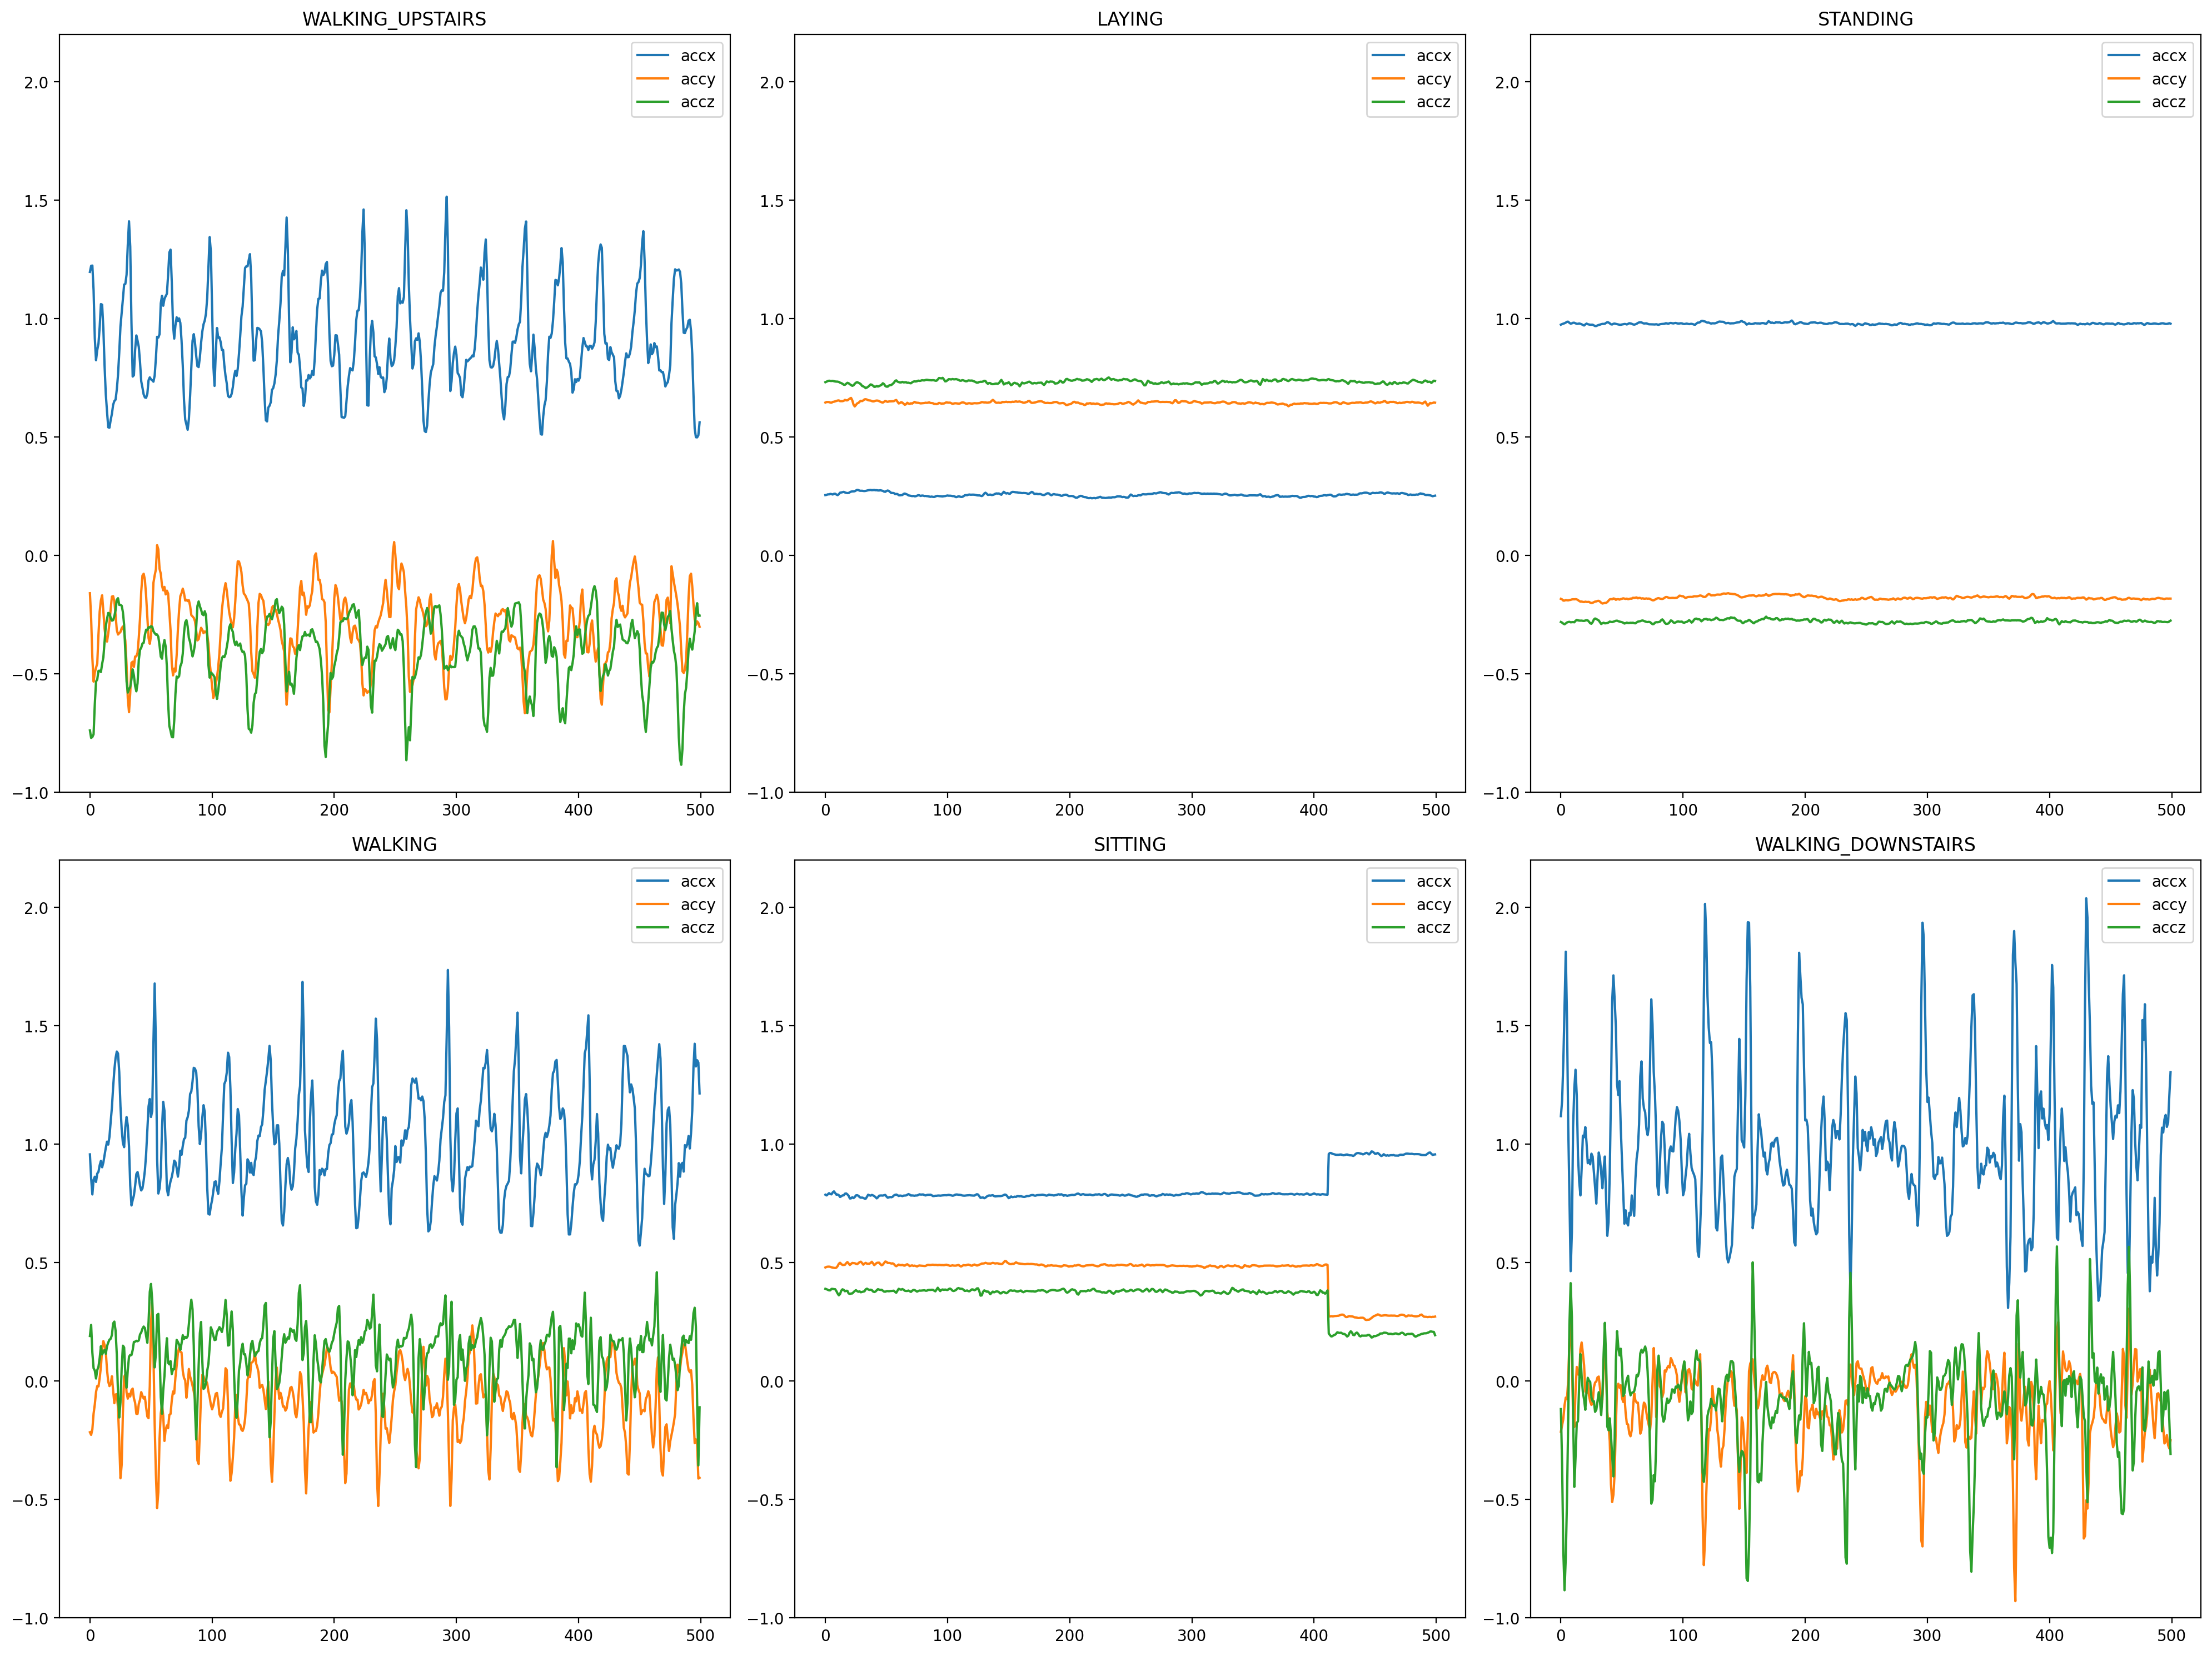

In [51]:
# Plotting graphs for different labels occurring first in y_train
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}
d = {}
fig = plt.figure(figsize=(20, 15))

c=0
for i,j in enumerate(y_train):
  if j not in d:
    data = X_train[i]
    ax = fig.add_subplot(2, 3, c+1)
    ax.plot(data[:,0],label="accx")
    ax.plot(data[:,1],label="accy")
    ax.plot(data[:,2],label="accz")
    ax.set_ylim(-1, 2.2)
    ax.set_title(ACTIVITIES[j])
    plt.legend()
    d[j] = X_train[i]
    c+=1

plt.tight_layout()
plt.show()

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

#### Since there are considerable visible variations between the activities' data, which can be further enhanced by techniques like feature engineering and dimensionality reduction; The model should be able to classify the different activities based on the data.

### 2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer. [0.5 marks]

Standard deviations in Linear Acceleration in each of the activities:
WALKING 0.0229
WALKING_UPSTAIRS 0.025
WALKING_DOWNSTAIRS 0.0413
SITTING 0.0182
STANDING 0.0071
LAYING 0.0154


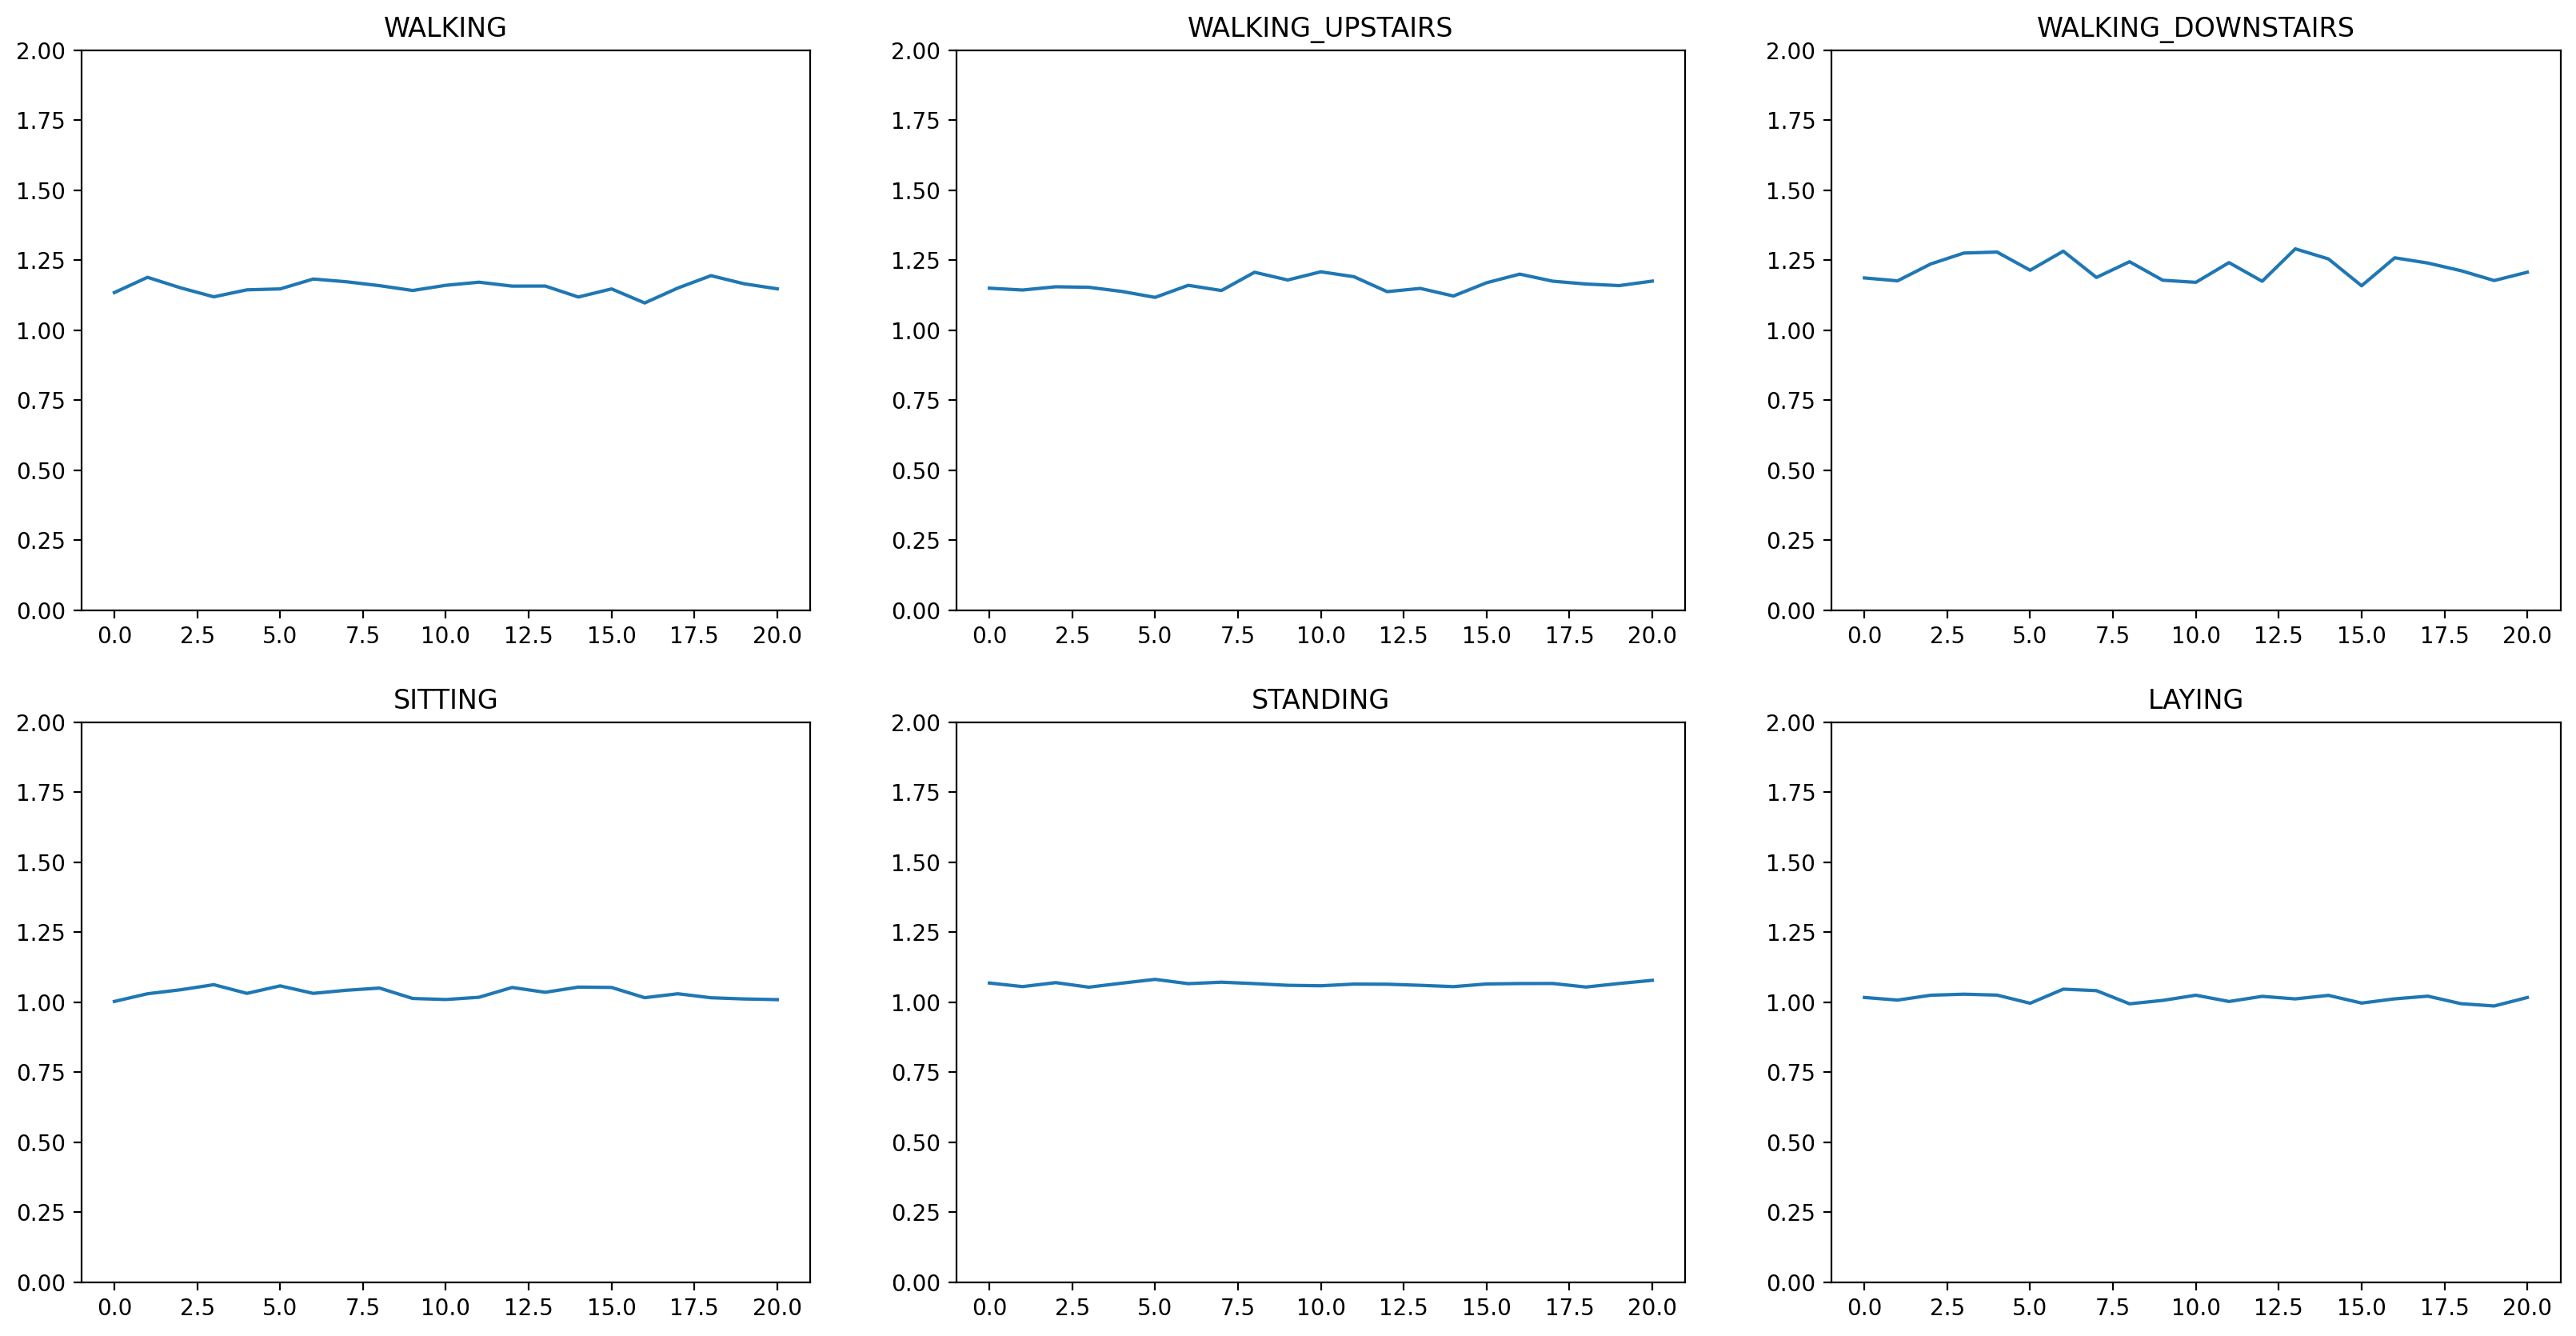

In [52]:
# Finding mean of linear acceleration of different activities
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

m = [[] for _ in range(6)]
for i,j in enumerate(y_train):
  c = 0
  for g in range(500):
    c += np.sum(X_train[i][g]**2)
  m[j-1].append(c/500)

fig = plt.figure(figsize=(20, 10))
print("Standard deviations in Linear Acceleration in each of the activities:")
for i in range(6):
  ax = fig.add_subplot(2, 3, i+1)
  ax.plot(m[i],label="linear acc")
  ax.set_ylim(0, 2)
  ax.set_title(ACTIVITIES[i+1])
  print(ACTIVITIES[i+1], np.round(np.std(m[i]), 4))

#### NO; It is clearly evident from linear acceleration data and by the graphs that dynamic activities have more than TWICE as much deviation in their values than static activities. We can set a threshold of around `deviation = 0.02` to differentiate between the static and dynamic activities.

### 3. Visualize the data using PCA. [1 marks]

In [53]:
# Conversion of data to appropriate format to apply PCA.
from sklearn.decomposition import PCA

df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
print(df.shape)


(63000, 4)


- Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

(126, 2)


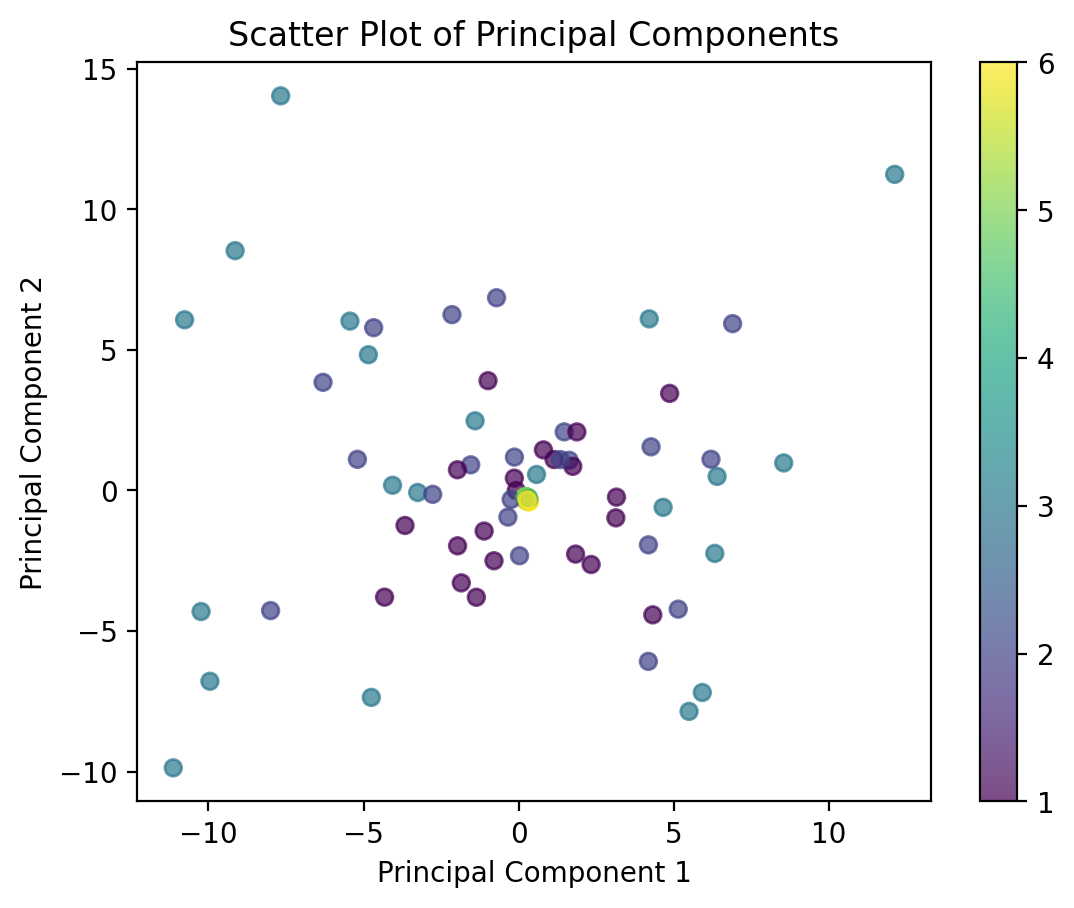

Classes: [(1, 'WALKING'), (2, 'WALKING_UPSTAIRS'), (3, 'WALKING_DOWNSTAIRS'), (4, 'SITTING'), (5, 'STANDING'), (6, 'LAYING')]


In [54]:
# Applying PCA on the dataframe on total acceleration.

from sklearn.preprocessing import StandardScaler
df["totalacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

pca = PCA(n_components=2)
xpca = pca.fit_transform(df["totalacc"].values.reshape(-1,500))
print(xpca.shape)

scatter = plt.scatter(xpca[:, 0],xpca[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatter)
plt.show()
print("Classes:",list(ACTIVITIES.items()))

- Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152) ->  (126, 2) by PCA


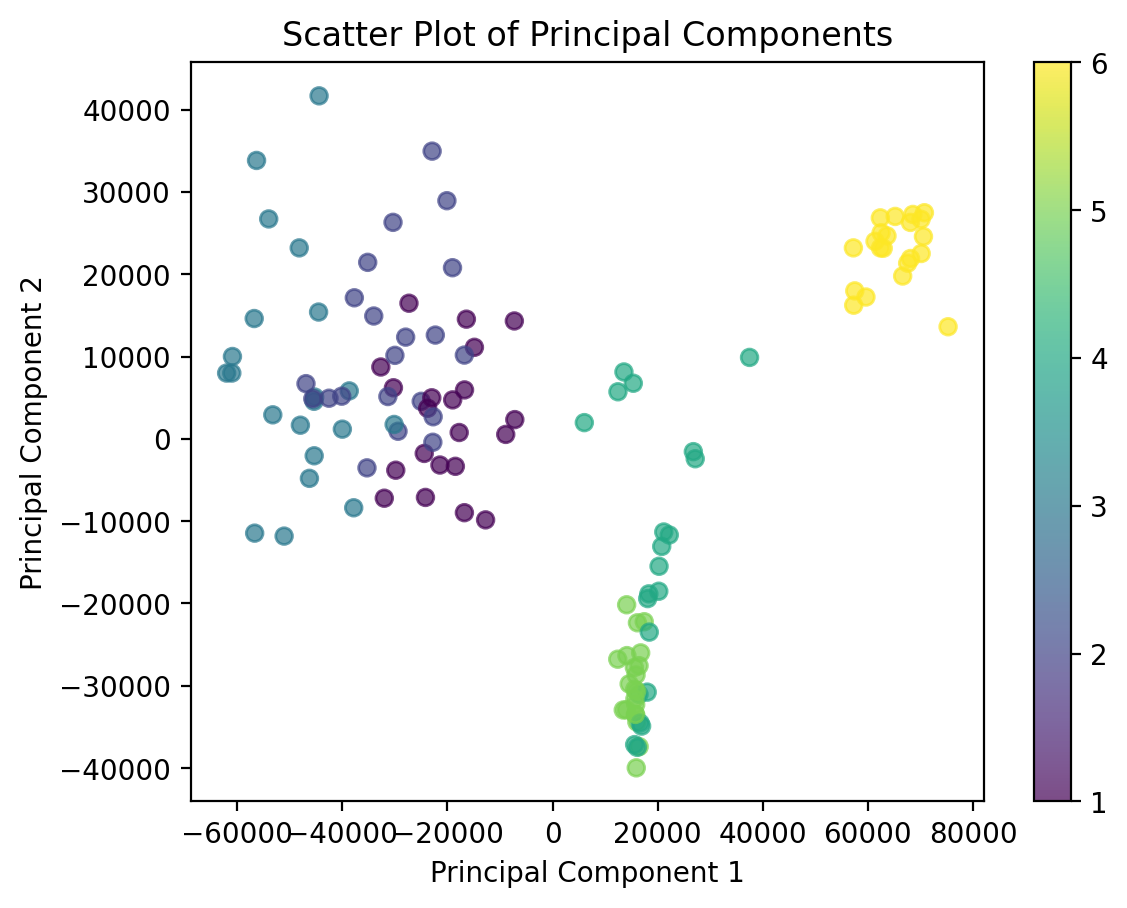

Classes: [(1, 'WALKING'), (2, 'WALKING_UPSTAIRS'), (3, 'WALKING_DOWNSTAIRS'), (4, 'SITTING'), (5, 'STANDING'), (6, 'LAYING')]


In [55]:
# Applying PCA on features obtained by TSFEL featurizer library.
import tsfel

cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg,df[["accx","accy","accz"]], fs=50, window_size=500)



TSFEL is better than PCA on total acceleration. The different activities are well classified in TSFEL as we can observe while in PCA on total acceleration, we can see kind of random plotting of points with presence of multiple outlier points.

- Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

- Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

`TODO`

### 4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

## Task 2 : Decision Trees for Human Activity Recognition [3 marks]

### 1. Use Sklearn Library to train Decision Tress. [1.5 marks]
- Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [68]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
d = pd.read_csv("./Task4-Data/Processed/Combined.csv")
acc = d[['gFx','gFy','gFz']]
dtest = d["Label"]

m = []
X_train_reshaped = X_train.reshape(-1,1500)



acc = acc.to_numpy()

acc_reshaped = acc.reshape(18,1500)

clf = DecisionTreeClassifier(random_state=2,max_depth=6)
clf.fit(X_train_reshaped, y_train)
dpred = clf.predict(acc_reshaped)

print(accuracy_score(dtest[::500], dpred))



0.3888888888888889


- Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [66]:
clf = DecisionTreeClassifier(random_state=2,max_depth=8)
clf.fit(features, y_train)
print(d.columns)
d.columns = ['Person','accx','accy','accz','Total acc','Label']
dtsfel = tsfel.time_series_features_extractor(cfg,d[["accx","accy","accz"]], fs=50, window_size=500)
dpred = clf.predict(dtsfel)
print(accuracy_score(dtest[::500],dpred))







Index(['Person', 'accx', 'accy', 'accz', 'Total acc', 'Label'], dtype='object')
*** Feature extraction started ***



*** Feature extraction finished ***
0.2777777777777778


- Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model

In [38]:
# m = []
# for i in range(2,15):
#     clf = DecisionTreeClassifier(random_state=2,max_depth=i)
#     clf.fit(x, yg)
#     yraw = clf.predict(xtest)
#     m.append((accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro', zero_division=0),
#           recall_score(y_test, y_pred, average='macro')))

clf = DecisionTreeClassifier(random_state=2,max_depth=6)
clf.fit(x, yg)
dpred = clf.predict(acc_reshaped)
print(dtest[::500],dpred)
# n = []
# for i in range(len(m)):
#     n.append(m[i][0])
# 
# q = 0
# idx = 0
# for i in range(len(n)):
#     if q < n[i]:
#         q = n[i]
#         idx = i
# print(f"Accuracy = {m[idx][0]*100}% at depth {idx+2}")
# print(f"Precision = {m[idx][1]}")
# print(f"Recall Score = {m[idx][2]}")
# plt.plot(range(2, 15), n)
# print(f"Confusion Matrix is\n{confusion_matrix(y_test, y_pred)}")


C:\Users\VICTUS\PycharmProjects\DCC Assignment 4\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1500 features, but DecisionTreeClassifier is expecting 561 features as input.

#### _End of Task 1 and 2_

In [39]:
X_train,x_test,y_train,y_test = train_test_split(acc,dtest,test_size=0.3)
clf = DecisionTreeClassifier(random_state=2,max_depth=6)
clf.fit(X_train,y_train)
dpred = clf.predict(acc_reshaped)



0.7814814814814814
